<h2>Excersice 1 (week 1, 2, 3)<h1>

## Introduction:
This weeks assignment for Fundamentals of Data Science. We are learning about the basics of Machine learning and statistics. 
    
For the excercise we got a dataset of smartwatches used in different French cities. Using the dataset we're able to learn how to visualise the data and manipulate it to gain insights. 

# Data Cleaning

In [37]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math 


df1 = pd.read_csv("steps.csv", delimiter=";") 
df2 = pd.read_csv("survey.csv")

df3 = pd.merge(df1, df2, on = 'id')

# #gewicht skippen op 44 en hoger dan 200
df3.drop(df3[df3['weight'] <= 44].index, inplace = True)
df3.drop(df3[df3['weight'] >= 200].index, inplace = True)
print(df3["weight"].max())
print(df3["weight"].min())

df_final= df3.sort_index(axis = 1, ascending=False)
df_final.fillna(0,inplace=True)
df_final
#de datafile manipuleren om er voor te zorgen dat de extra columns naar voren komen ipv aan het einde.


155.0
45.0


,weight,id,hh_size,height,gender,education_1,education,city,age,9-9-2013,...,1-8-2013,1-7-2013,1-5-2014,1-4-2014,1-3-2014,1-2-2014,1-12-2013,1-11-2013,1-10-2013,1-1-2014
0,98.0,1,4,178.0,Male,Master or doctorate,4,Bordeaux,25-34,0.0,...,0.0,10798.0,0.0,0.0,0.0,0.0,2113.0,1211.0,9465.0,8449.0
1,77.0,2,1,180.0,Male,Bachelor,3,Lille,35-44,7443.0,...,8521.0,6181.0,0.0,0.0,0.0,0.0,0.0,6425.0,2967.0,377.0
2,83.0,3,2,180.0,Male,Master or doctorate,2,Montpellier,25-34,0.0,...,0.0,12073.0,0.0,0.0,0.0,0.0,0.0,9414.0,17518.0,1615.0
3,80.0,4,1,178.0,Male,Bachelor,1,Lyon,<25,0.0,...,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61.0,5,3,167.0,Female,Bachelor,4,Montpellier,25-34,3279.0,...,0.0,0.0,0.0,10038.0,0.0,0.0,0.0,0.0,1482.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,59.0,925,3,165.0,Female,Master or doctorate,4,Lille,45-54,0.0,...,0.0,6739.0,0.0,0.0,0.0,0.0,2824.0,10437.0,8878.0,0.0
925,90.0,926,3,192.0,Male,Bachelor,5,Lille,<25,0.0,...,0.0,0.0,0.0,0.0,0.0,680.0,0.0,0.0,0.0,3699.0
926,71.0,927,2,181.0,Male,Bachelor,2,Montpellier,35-44,2608.0,...,0.0,0.0,0.0,0.0,13250.0,3949.0,17100.0,14311.0,8542.0,13927.0
927,65.0,928,1,172.0,Female,High school,1,Lille,55-64,0.0,...,4660.0,15521.0,0.0,0.0,0.0,0.0,0.0,0.0,10073.0,0.0


In [74]:
#Create the variable mean steps per participant. 
only_dates = df_final.loc[0:925,'9-9-2013': '1-1-2014']
only_dates= only_dates.astype('Int64')

mean_steps = only_dates.mean(axis=1, skipna = True, ).round(decimals=0)
df_final = df_final.assign(mean_steps = mean_steps)

#show head of the resulting dataframe
mean_steps.head()
df_final
    

,weight,id,hh_size,height,gender,education_1,education,city,age,9-9-2013,...,1-5-2014,1-4-2014,1-3-2014,1-2-2014,1-12-2013,1-11-2013,1-10-2013,1-1-2014,mean_steps,BMI
0,98.0,1,4,178.0,Male,Master or doctorate,4,Bordeaux,25-34,0.0,...,0.0,0.0,0.0,0.0,2113.0,1211.0,9465.0,8449.0,5134.0,31.0
1,77.0,2,1,180.0,Male,Bachelor,3,Lille,35-44,7443.0,...,0.0,0.0,0.0,0.0,0.0,6425.0,2967.0,377.0,2826.0,24.0
2,83.0,3,2,180.0,Male,Master or doctorate,2,Montpellier,25-34,0.0,...,0.0,0.0,0.0,0.0,0.0,9414.0,17518.0,1615.0,3746.0,26.0
3,80.0,4,1,178.0,Male,Bachelor,1,Lyon,<25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,25.0
4,61.0,5,3,167.0,Female,Bachelor,4,Montpellier,25-34,3279.0,...,0.0,10038.0,0.0,0.0,0.0,0.0,1482.0,0.0,875.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,59.0,922,2,170.0,Female,Bachelor,2,Montpellier,25-34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,20.0
922,65.0,923,2,170.0,Male,Master or doctorate,2,Lyon,35-44,3152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1374.0,22.0
923,0.0,924,1,175.0,Male,Master or doctorate,1,Lille,<25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379.0,0.0
924,59.0,925,3,165.0,Female,Master or doctorate,4,Lille,45-54,0.0,...,0.0,0.0,0.0,0.0,2824.0,10437.0,8878.0,0.0,1743.0,22.0


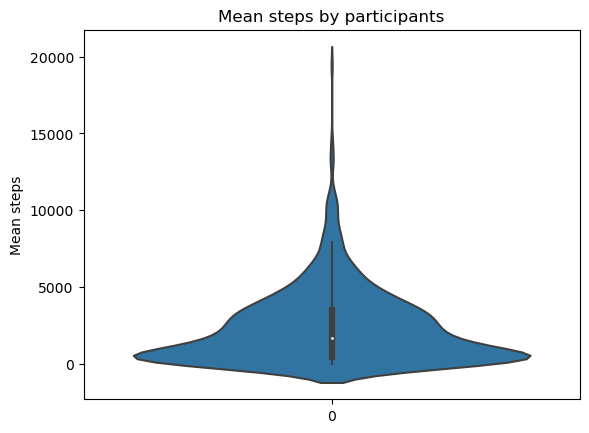

In [39]:
sns.violinplot(df_final['mean_steps'])
plt.title('Mean steps by participants')
plt.ylabel('Mean steps')
plt.xlabel('')
plt.show()

#Due to the graph it is shown that one of the participants mean is an outlier compared to the others. A lot of the means are around 20000/30000 steps 

Due to the graph it is shown that one of the participants mean is an outlier compared to the others. A lot of the means are in between 5000 and 10000. Because of the one outlier that is a mean of 20000 the plot is skewed and harder to read.

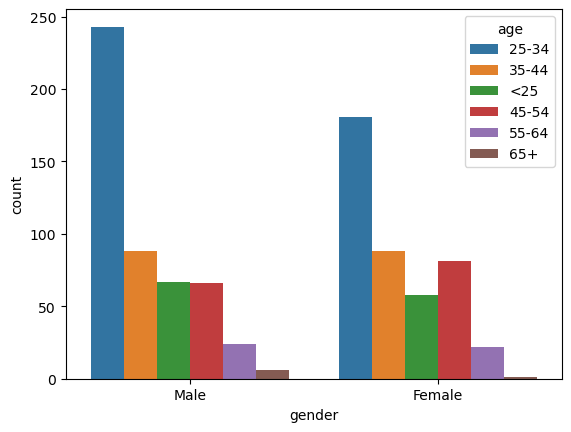

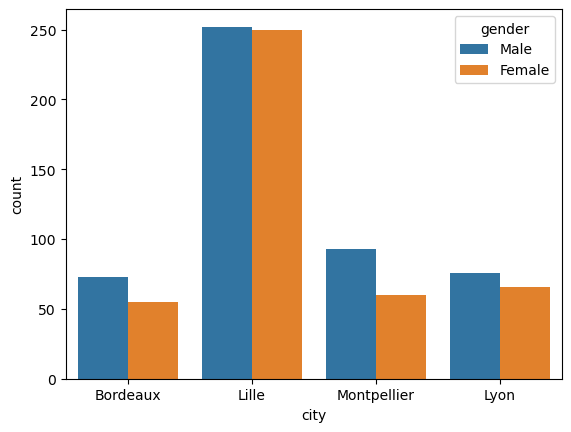

In [40]:
#next step: The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
#Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
#Describe and interpret the results

sns.countplot(x=df_final["gender"], hue=df_final["age"], data=df3)
plt.show()

sns.countplot(x=df_final["city"], hue=df_final["gender"], data=df3)
plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_1516\1938429862.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_final, x="mean_steps", hue="age", col="gender", kind="kde")


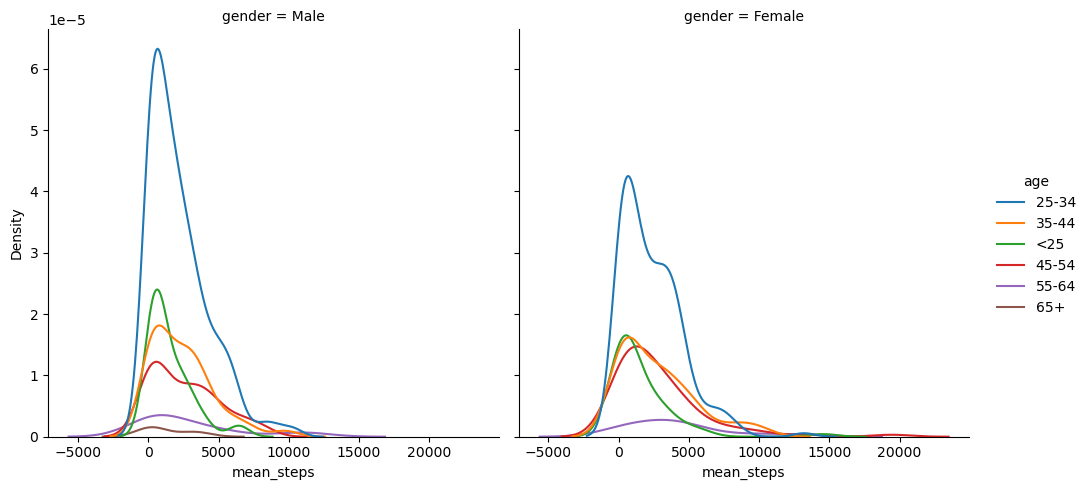

In [41]:
sns.displot(data=df_final, x="mean_steps", hue="age", col="gender", kind="kde")

# Feature Engineering

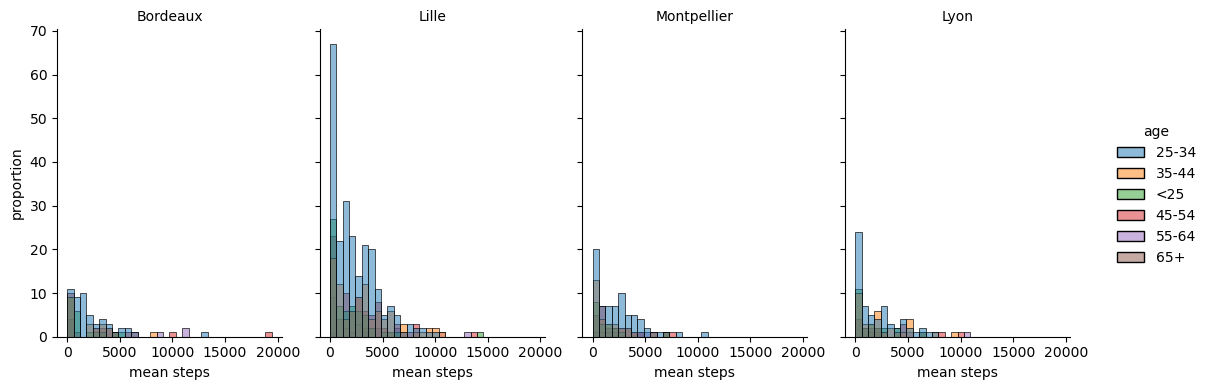

In [42]:
g = sns.displot(
    data=df_final, x="mean_steps", hue="age", col="city",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("mean steps","proportion")
g.set_titles("{col_name}")

## Data analysis:
Age: the biggest age category is 25-34. Typically this is an healty agegroup that could easily walk. Because this is the biggest group the mean of steps might be relatively high. 

City: When comparing the 4 cities the biggest amount of users live in Lille. About 500 participants are from Lille. If Lille is a relatively healthy or lively city with this might not be an equal analysis.

Mean_steps:The difference between the ages in Lille is very significant. Compared to the other cities the differences in age is a lot bigger. 

In [43]:
#Feature engineering: The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.
for i in df_final["weight"]:
    BMI = (df_final["weight"]/(df_final["height"]/100)**2).round(decimals=1)
    df_final["BMI"] = BMI 
    
df_final

,weight,id,hh_size,height,gender,education_1,education,city,age,9-9-2013,...,1-5-2014,1-4-2014,1-3-2014,1-2-2014,1-12-2013,1-11-2013,1-10-2013,1-1-2014,mean_steps,BMI
0,98.0,1,4,178.0,Male,Master or doctorate,4,Bordeaux,25-34,0.0,...,0.0,0.0,0.0,0.0,2113.0,1211.0,9465.0,8449.0,5134.0,30.9
1,77.0,2,1,180.0,Male,Bachelor,3,Lille,35-44,7443.0,...,0.0,0.0,0.0,0.0,0.0,6425.0,2967.0,377.0,2826.0,23.8
2,83.0,3,2,180.0,Male,Master or doctorate,2,Montpellier,25-34,0.0,...,0.0,0.0,0.0,0.0,0.0,9414.0,17518.0,1615.0,3746.0,25.6
3,80.0,4,1,178.0,Male,Bachelor,1,Lyon,<25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,25.2
4,61.0,5,3,167.0,Female,Bachelor,4,Montpellier,25-34,3279.0,...,0.0,10038.0,0.0,0.0,0.0,0.0,1482.0,0.0,875.0,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,59.0,925,3,165.0,Female,Master or doctorate,4,Lille,45-54,0.0,...,0.0,0.0,0.0,0.0,2824.0,10437.0,8878.0,0.0,1743.0,21.7
925,90.0,926,3,192.0,Male,Bachelor,5,Lille,<25,0.0,...,0.0,0.0,0.0,680.0,0.0,0.0,0.0,3699.0,732.0,24.4
926,71.0,927,2,181.0,Male,Bachelor,2,Montpellier,35-44,2608.0,...,0.0,0.0,13250.0,3949.0,17100.0,14311.0,8542.0,13927.0,NaN,21.7
927,65.0,928,1,172.0,Female,High school,1,Lille,55-64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10073.0,0.0,NaN,22.0


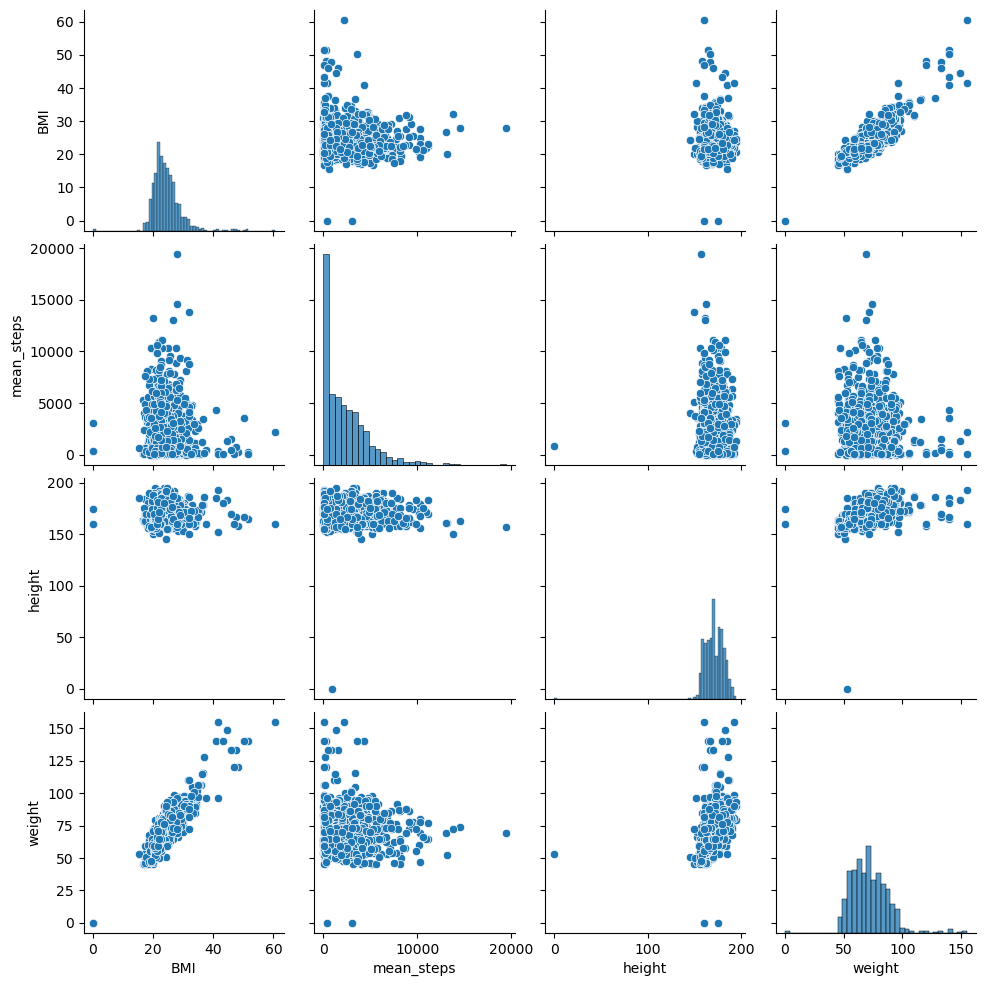

In [44]:
#Make a scatterplot matrix of the numerical variables
df_subset = df_final[["gender", "BMI", "mean_steps", "age", "height", "weight"]]
sns.pairplot(df_subset)
plt.show()

In [45]:
#Make a correlation matrix of the numerical variables
corr = df_final[["gender", "BMI", "mean_steps", "age", "height", "weight", "education"]].corr() 
corr

,BMI,mean_steps,height,weight,education
BMI,1.000000,-0.047753,0.025003,0.873019,0.027811
mean_steps,-0.047753,1.000000,-0.056278,-0.080053,0.029491
height,0.025003,-0.056278,1.000000,0.445499,-0.014054
weight,0.873019,-0.080053,0.445499,1.000000,0.008238
education,0.027811,0.029491,-0.014054,0.008238,1.000000


## Data analysis
Looking at the correlation matrix there are no strong correlations in this dataset. The only strong correlations are the BMI and weight columns, which is logical because the weight column is used to generate the BMI column.

## Linear regression 
Linear regression is a way to see if there are relations within certain variables. It will look at a graph and look for a constant growth within the graph. Using this constant we can make predictions with new input.

# Predictive model

In [46]:
#create dummy variables for categorial variables
pd.get_dummies(df_final,prefix =None, columns=['gender', 'city', 'age'])

,weight,id,hh_size,height,education_1,education,9-9-2013,9-8-2013,9-7-2013,9-5-2014,...,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,98.0,1,4,178.0,Master or doctorate,4,0.0,6869.0,5708.0,0.0,...,1,0,0,0,1,0,0,0,0,0
1,77.0,2,1,180.0,Bachelor,3,7443.0,15550.0,6712.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,83.0,3,2,180.0,Master or doctorate,2,0.0,0.0,13779.0,6227.0,...,0,0,0,1,1,0,0,0,0,0
3,80.0,4,1,178.0,Bachelor,1,0.0,0.0,3875.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,61.0,5,3,167.0,Bachelor,4,3279.0,884.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,59.0,925,3,165.0,Master or doctorate,4,0.0,3257.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
925,90.0,926,3,192.0,Bachelor,5,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
926,71.0,927,2,181.0,Bachelor,2,2608.0,8808.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
927,65.0,928,1,172.0,High school,1,0.0,12377.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [80]:
#Fit a linear regression model to predict the mean steps per participant, using the training data. 
#You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).



# Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

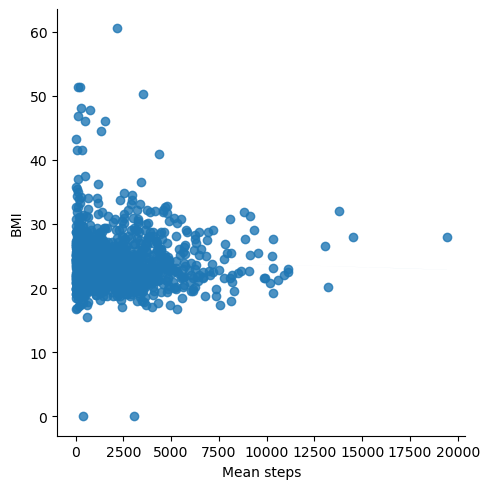

In [52]:
#Evaluate the model on the test data
#Predictive power of the model (R2, RMSE)
sns.lmplot(x="mean_steps", y='BMI', data=df_final, ci=True )
plt.xlabel("Mean steps")
plt.ylabel("BMI")
plt.show


In [75]:
df_final.dropna(inplace=True, subset=['mean_steps', 'BMI'])
df_final['mean_steps']


0      5134.0
1      2826.0
2      3746.0
3       222.0
4       875.0
        ...  
921      80.0
922    1374.0
923     379.0
924    1743.0
925     732.0
Name: mean_steps, Length: 922, dtype: float64

In [77]:
#predicting linear regression with lm.predict()
x = df_final[['mean_steps']]
y = df_final[["weight"]]
lm = LinearRegression()
lm.fit(x,y)

df_final['mean_steps_p'] = lm.predict(x)
df_final["mean_steps_p"]

0      70.707829
1      71.916485
2      71.434699
3      73.280151
4      72.938188
         ...    
921    73.354514
922    72.676871
923    73.197933
924    72.483632
925    73.013074
Name: mean_steps_p, Length: 922, dtype: float64

In [92]:
#predictive power: R2, RMSE
r2_score(df_final['mean_steps'], df_final['mean_steps_p'])


-0.8845011842434605

In [91]:
#predictive power: RMSE
math.sqrt(mean_squared_error(df_final['mean_steps'], df_final['mean_steps_p']))

3311.162655530629

In [93]:
print("Participants has a weight of", lm.predict([[10000]]).round(decimals=1), 'kg based on the mean steps of the participant')

Participants has a weight of [[68.2]] kg based on the mean steps of the participant


C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Interpretation of results
Looking at the results 3 conclusions could be made.

1. because there are no strong correlations in this dataset the prediciton is weak. Therefor the prediction of weight for the amount of steps isn't really strong. Looking at the outcome the predicition is that the more steps a user has as the mean the lower their weight is.
2. The R^2 score is -0.88 which means that -88% of the model isn't explained by the model.
3. Looking at the RMSE score, the predicition is off with 3311.16 steps which is a big difference to make predictions on. More research should be done to make sure the error score is lower to make better predictions. 

# Conclusion
Due to the lack of correlations the predictions based on the models we used are way off. More research should be done to make sure the error score is lower to make better predictions. This means that the data collected might lack due to the diversity issue. (more men than women) The data isn't balanced due to the big amount of users in Lille compared to the other cities. This might create an unbalanced dataset. To have more balance the distribution of the users should be more equal.
